StdAtpUS.py

In [4]:
import math

def StdAtpUS(h):
    """Standard Atmosphere
    Input: h altitude(ft)
    Output: T temperature(F), p pressure(lbs/ft^2),
            rho density(slug/ft^3)
    """     
    h1, h2, h3 = 3.6089e4, 6.5616e4, 9.0e4
    a0, a2, g = -3.567e-3, 5.494e-4, 32.2
    R = 1716
    T0, p0, rho0 = 518.67, 2116.2, 2.3769e-3
    T1 = T0 + a0 * h1
    p1 = p0 * (T1/T0)**(-g/a0/R)
    rho1 = rho0 * (T1/T0)**(-g/a0/R-1)
    T2 = T1
    p2 = p1 * math.exp(-g/R/T2*(h2-h1))
    rho2 = rho1 * math.exp(-g/R/T2*(h2-h1))
    if h <= h1:
        print('Troposphere')
        T=T0+a0*h
        p=p0*(T/T0)**(-g/a0/R)
        rho=rho0*(T/T0)**(-g/a0/R-1)
    elif h <= h2:
        print('Tropopause')
        T=T1
        p=p1*math.exp(-g/R/T*(h-h1))
        rho=rho1*math.exp(-g/R/T*(h-h1))
    elif h <= h3:
        print('Stratosphere')
        T=T2+a2*(h-h2)
        p=p2*(T/T2)**(-g/a2/R)
        rho=rho2*(T/T2)**(-g/a2/R-1)
    else:
        print('Error: the altitude should be less than 9000 ft')
    return T, p, rho                            

FigJetEng.py

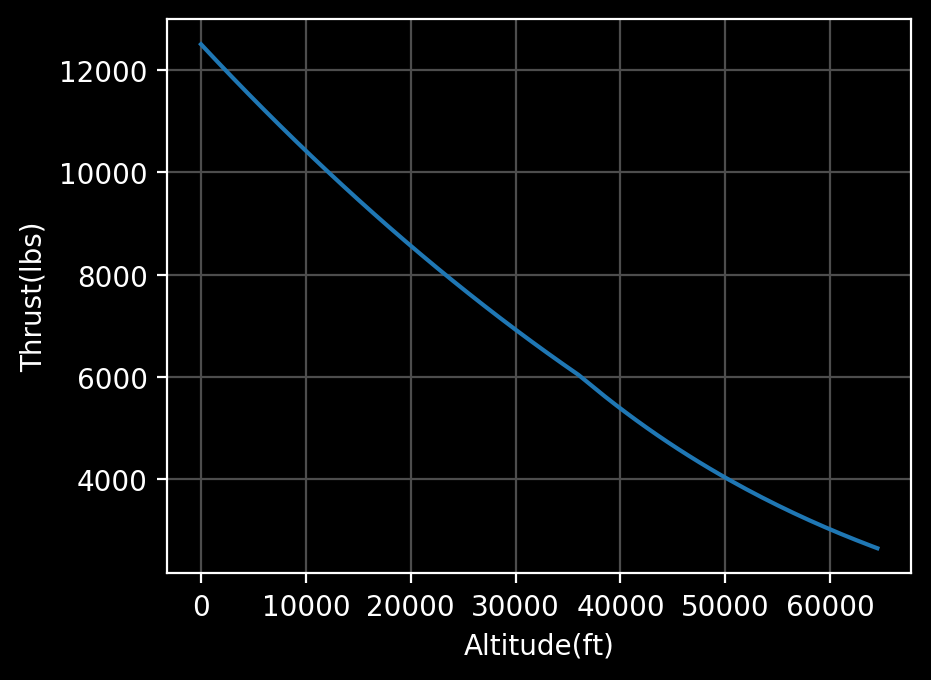

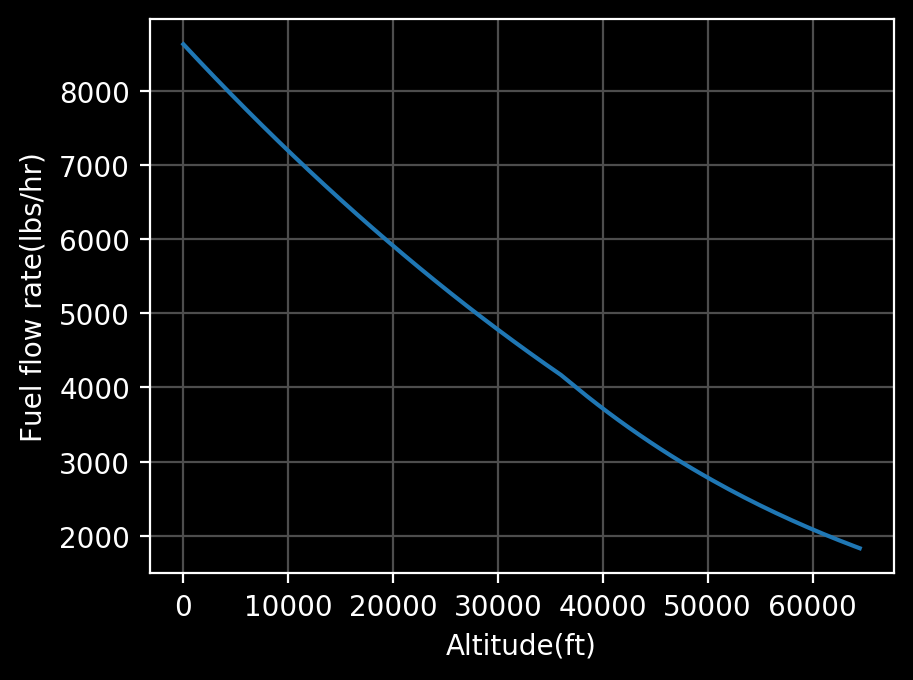

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

def StdAtpUS(h):
    """Standard Atmosphere
    Input: h altitude(ft)
    Output: T temperature(F), p pressure(lbs/ft^2),
            rho density(slug/ft^3)
    """     
    h1, h2, h3 = 3.6089e4, 6.5616e4, 9.0e4
    a0, a2, g = -3.567e-3, 5.494e-4, 32.2
    R = 1716
    T0, p0, rho0 = 518.67, 2116.2, 2.3769e-3
    T1 = T0 + a0 * h1
    p1 = p0 * (T1/T0)**(-g/a0/R)
    rho1 = rho0 * (T1/T0)**(-g/a0/R-1)
    T2 = T1
    p2 = p1 * math.exp(-g/R/T2*(h2-h1))
    rho2 = rho1 * math.exp(-g/R/T2*(h2-h1))
    if h <= h1:
#        print('Troposphere')
        T=T0+a0*h
        p=p0*(T/T0)**(-g/a0/R)
        rho=rho0*(T/T0)**(-g/a0/R-1)
    elif h <= h2:
#        print('Tropopause')
        T=T1
        p=p1*math.exp(-g/R/T*(h-h1))
        rho=rho1*math.exp(-g/R/T*(h-h1))
    elif h <= h3:
#        print('Stratosphere')
        T=T2+a2*(h-h2)
        p=p2*(T/T2)**(-g/a2/R)
        rho=rho2*(T/T2)**(-g/a2/R-1)
    else:
        print('Error: the altitude should be less than 9000 ft')
    return T, p, rho    

alt = np.arange(0,65000,500,float)
T = np.zeros(alt.size)
FR = np.zeros(alt.size)
Tsmax, m, c = 12500, 0.6, 0.69
i = 0
for alt_i in alt:
    Temp, Pr, rho = StdAtpUS(alt_i)
    T[i] = ((rho/0.0023769)**m)*Tsmax
    FR[i] = T[i]*c
    i = i+1
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(alt, T)
ax1.set_xlabel("Altitude(ft)")
ax1.set_ylabel("Thrust(lbs)")
ax1.grid(True)
fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.plot(alt, FR)
ax2.set_xlabel("Altitude(ft)")
ax2.set_ylabel("Fuel flow rate(lbs/hr)")
ax2.grid(True)

FigPropEng.py

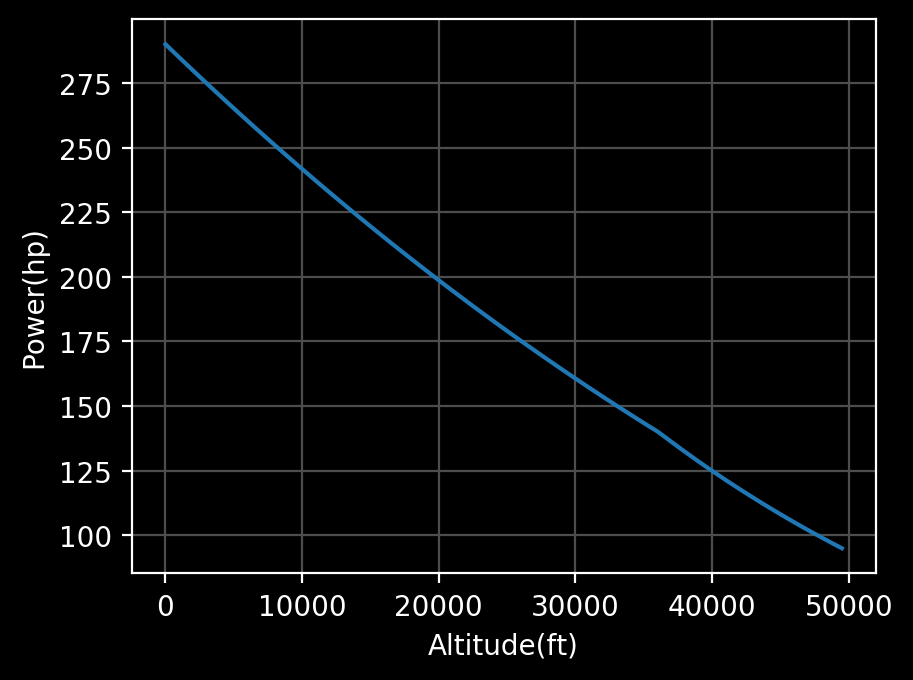

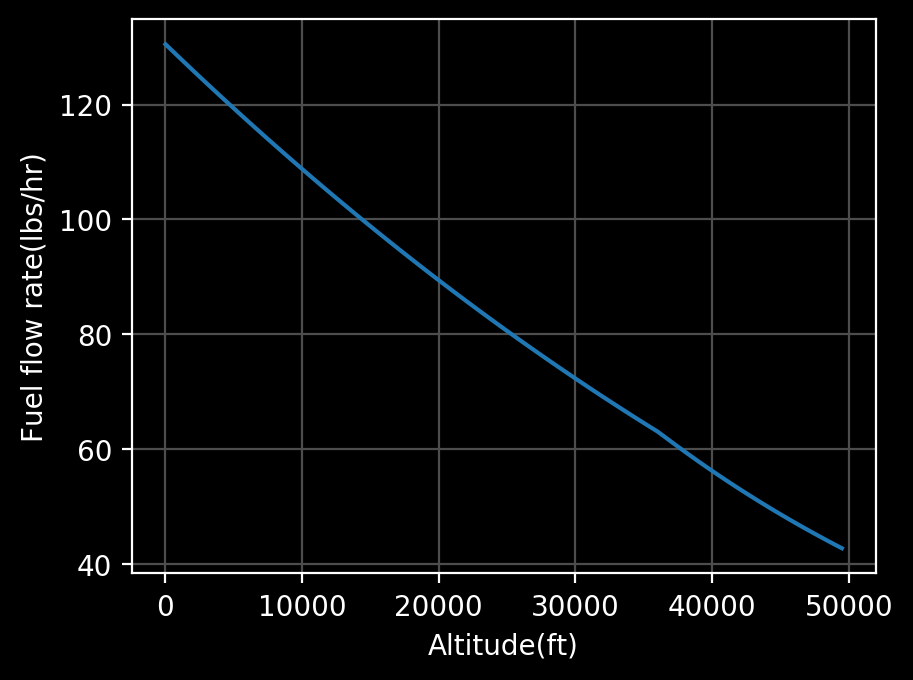

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def StdAtpUS(h):
    """Standard Atmosphere
    Input: h altitude(ft)
    Output: T temperature(F), p pressure(lbs/ft^2), rho density(slug/ft^3)
    """     
    h1, h2, h3 = 3.6089e4, 6.5616e4, 9.0e4
    a0, a2, g = -3.567e-3, 5.494e-4, 32.2
    R = 1716
    T0, p0, rho0 = 518.67, 2116.2, 2.3769e-3
    T1 = T0 + a0 * h1
    p1 = p0 * (T1/T0)**(-g/a0/R)
    rho1 = rho0 * (T1/T0)**(-g/a0/R-1)
    T2 = T1
    p2 = p1 * math.exp(-g/R/T2*(h2-h1))
    rho2 = rho1 * math.exp(-g/R/T2*(h2-h1))
    if h <= h1:
#        print('Troposphere')
        T=T0+a0*h
        p=p0*(T/T0)**(-g/a0/R)
        rho=rho0*(T/T0)**(-g/a0/R-1)
    elif h <= h2:
#        print('Tropopause')
        T=T1
        p=p1*math.exp(-g/R/T*(h-h1))
        rho=rho1*math.exp(-g/R/T*(h-h1))
    elif h <= h3:
#        print('Stratosphere')
        T=T2+a2*(h-h2)
        p=p2*(T/T2)**(-g/a2/R)
        rho=rho2*(T/T2)**(-g/a2/R-1)
    else:
        print('Error: the altitude should be less than 9000 ft')
    return T, p, rho    

alt = np.arange(0,50000,500,float)
P = np.zeros(alt.size)
FR = np.zeros(alt.size)
Psmax, m, c = 290, 0.6, 0.45
i = 0
for alt_i in alt:
    Temp, Pr, rho = StdAtpUS(alt_i)
    P[i] = ((rho/0.0023769)**m)*Psmax
    FR[i] = P[i]*c
    i = i+1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(alt, P)
ax.set_xlabel("Altitude(ft)")
ax.set_ylabel("Power(hp)")
ax.grid(True)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(alt, FR)
ax.set_xlabel("Altitude(ft)")
ax.set_ylabel("Fuel flow rate(lbs/hr)")
ax.grid(True)

ThrustRequired.py

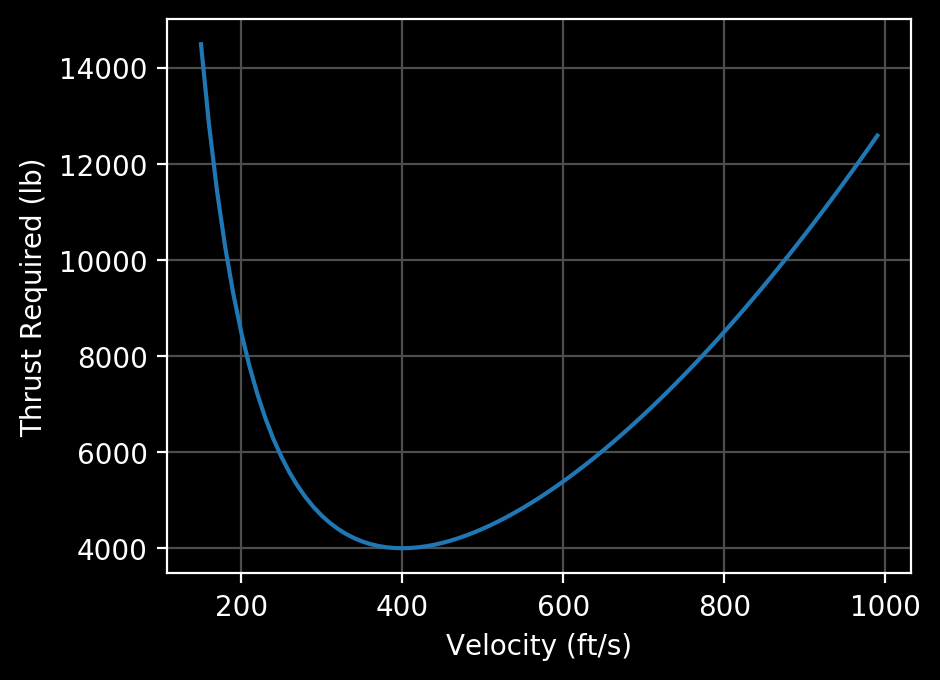

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

V = np.arange(150,1000,10,float)
T = np.zeros(V.size)
W, S, CD0, eta, rho = 73000, 950, 0.015, 0.05, 1.7553e-3  # 10000ft
i = 0
for V_i in V:
    T[i] = 1/2 * rho * V[i]**2 * S * CD0 + 2 * eta * W**2 / (rho * V[i]**2 * S)
    i = i+1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(V, T)
ax.set_xlabel("Velocity (ft/s)")
ax.set_ylabel("Thrust Required (lb)")
ax.grid(True)

FeatureSpeed.py

Vs=176.868377, Ve=399.897688, Vmin=178.628139, Vmax=895.257384


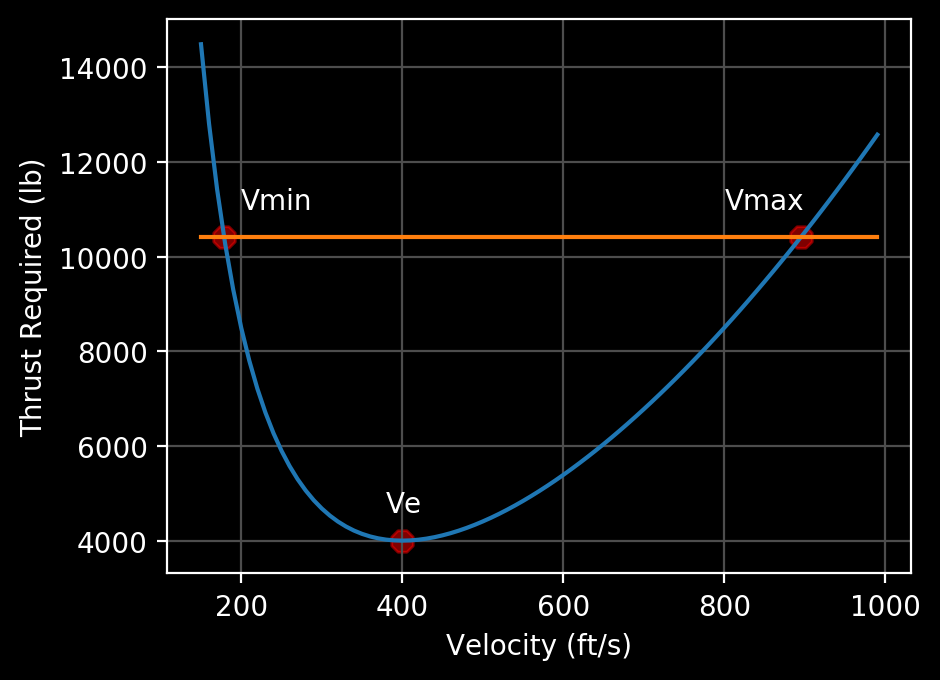

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

def StdAtpUS(h):
    """Standard Atmosphere
    Input: h altitude(ft)
    Output: T temperature(F), p pressure(lbs/ft^2),
            rho density(slug/ft^3)
    """     
    h1, h2, h3 = 3.6089e4, 6.5616e4, 9.0e4
    a0, a2, g = -3.567e-3, 5.494e-4, 32.2
    R = 1716
    T0, p0, rho0 = 518.67, 2116.2, 2.3769e-3
    T1 = T0 + a0 * h1
    p1 = p0 * (T1/T0)**(-g/a0/R)
    rho1 = rho0 * (T1/T0)**(-g/a0/R-1)
    T2 = T1
    p2 = p1 * math.exp(-g/R/T2*(h2-h1))
    rho2 = rho1 * math.exp(-g/R/T2*(h2-h1))
    if h <= h1:
#        print('Troposphere')
        T=T0+a0*h
        p=p0*(T/T0)**(-g/a0/R)
        rho=rho0*(T/T0)**(-g/a0/R-1)
    elif h <= h2:
#        print('Tropopause')
        T=T1
        p=p1*math.exp(-g/R/T*(h-h1))
        rho=rho1*math.exp(-g/R/T*(h-h1))
    elif h <= h3:
#        print('Stratosphere')
        T=T2+a2*(h-h2)
        p=p2*(T/T2)**(-g/a2/R)
        rho=rho2*(T/T2)**(-g/a2/R-1)
    else:
        print('Error: the altitude should be less than 9000 ft')
    return T, p, rho  

V = np.arange(150,1000,10,float)
T = np.zeros(V.size)
Tmax = np.zeros(V.size)
W, S, CD0, eta, alt = 73000, 950, 0.015, 0.05, 10000
Tsmax, m, CLmax = 12500, 0.6, 2.8
Temp, Pr, rho = StdAtpUS(alt)
Temps, Prs, rhos = StdAtpUS(0)  # sea level
Vs = math.sqrt(2*W/(rho*S*CLmax))  # stall speed
Ve = math.sqrt(2*W/(rho*S)*math.sqrt(eta/CD0)) # max endurance speed
roots = np.roots([1/2*rho*S*CD0, 0, -Tsmax*(rho/rhos)**m, 0, 2*eta*W*W/rho/S])
r = sorted(x.real for x in roots)
Vn1, Vn2, Vmin, Vmax = r
Tvmin = 1/2 * rho * Vmin**2 * S * CD0 + 2 * eta * W**2 / (rho * Vmin**2 * S)
Tvmax = 1/2 * rho * Vmax**2 * S * CD0 + 2 * eta * W**2 / (rho * Vmax**2 * S)
Tve = 1/2 * rho * Ve**2 * S * CD0 + 2 * eta * W**2 / (rho * Ve**2 * S)
    
print('Vs=%f, Ve=%f, Vmin=%f, Vmax=%f' %(Vs,Ve,Vmin,Vmax))

i = 0
for V_i in V:
    T[i]=1/2 * rho * V[i]**2 * S * CD0 + 2 * eta * W**2 / (rho * V[i]**2 * S)
    Tmax[i] = ((rho/rhos)**m) * Tsmax
    i = i+1

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(V, T)
ax.plot(V, Tmax)
ax.scatter(Vmin, Tvmin, s=70, c="red", marker="8", alpha=0.5)
ax.scatter(Vmax, Tvmax, s=70, c="red", marker="8", alpha=0.5)
ax.scatter(Ve, Tve, s=70, c="red", marker="8", alpha=0.5)
ax.text(380,4600,'Ve')
ax.text(200,11000,'Vmin')
ax.text(800,11000,'Vmax')
ax.set_xlabel("Velocity (ft/s)")
ax.set_ylabel("Thrust Required (lb)")
ax.grid(True)